# Projet . Tests d'hypothèse
*Rémi de Guiran. D'après une idée de Florian Dadouchi*

Pour les 3 journées de cours consacrées à cette partie, nous allons nous intéresser à la détection d'un signal sonore. Cela nous amènera en première itération à réaliser une étude sur un bruit. Puis nous nous intéresserons à la détection d'un signal sonore présent au milieu du bruit. Pour réaliser une détection, nous allons devoir faire une hypothèse qui nous permettra de décider si oui ou non, un signal sonore est détecté. 

Vous aborderez les notions suivantes :
* Fonctions de distribution en statistique (continues et discrètes)
* Elements de probabilités
* Tests d'hypothèses (choix d'une hypothèse nulle, d'une hypothèse alternative, critère de significativité et p-value)

Si cela remonte à loin, vous aurez besoin de vous raffraichir la mémoire sur certaines notions :
* Les bases du calcul différentiel et intégral (Qu'est ce qu'une dérivée ? Une intégrale ? etc). Vous n'aurez pas besoin de calculer des intégrales analytiquement mais il sera important de comprendre ces concepts pour avancer
* Les bases de probabilités.

**Sujet :** 
Depuis quelque temps, bien que vivant dans un endroit très calme la nuit, vous vous demandez si des sons ne vous dérangent pas pendant votre sommeil. Bien décidé à avoir le coeur net et plutôt que de vous demander à chaque reveil si celui-ci est dû à un son quelconque ou juste à une mauvaise qualité de sommeil, vous décidez de réaliser un enregistrement sonore la nuit, et de créer un test qui permettra de détecter les sons qui se seront produits durant cette nuit.

**Information importante :**

Toutes les lois de probabilités porteront sur la valeur absolue de l’amplitude mesurée. De manière générale, par défaut toute référence à une amplitude renvoie à la valeur absolue de l’amplitude mesurée. Le cas contraire vous sera explicité. L’abréviation **va** renvoie à la valeur absolue, et **vr** à la valeur réelle.
Tous les enregistrements sont disponibles avec le sujet, chacun en double :
* un au format ".wav" (ça serait dommage de ne pas utiliser vos oreilles alors que vous travaillez sur des signaux sonores)
* l'autre et en format .txt.

Chaque enregistrement est **échantillonné à 48 kHz**.

Pour éviter de perdre du temps, la variable "signal sonore" contenue dans chaque fichier .txt est déjà normalisée, pour avoir des amplitudes de signaux n'excédant pas quelques unités. Vous n'aurez donc pas besoin de modifier vos données pour travailler dessus.


**Resources :**


* Lois de probabilités :

Poly "Statistique Appliquée", chapitres 2.1 et 3.1

https://www.youtube.com/watch?v=YXLVjCKVP7U

https://statisticsbyjim.com/basics/probability-distributions/




* Tests d'hypothèses :

Poly "Statistique : Tests d'hypothèses", chapitre 1

https://www.youtube.com/watch?v=tTeMYuS87oU

https://towardsdatascience.com/everything-you-need-to-know-about-hypothesis-testing-part-i-4de9abebbc8a

# Iteration 1 - Etude du bruit et d'un son

# A Etude du bruit

Avant de commencer à réfléchir à un quelconque test de detection de son, vous décidez d'étudier le bruit. Le bruit c'est en fait tout ce qui ne vous intéresse pas, une fluctuation très faiblement audible (écouter le fichier wav) et qui ne vous dérange pas pendant votre sommeil (vous vivez dans un endroit calme). Ce qui vous intéresse in fine, ce sont les sons (on distingue donc bien les notions de son et de bruit). Mais pour espérer les détecter des **sons**, il vous faut d'abord caractériser **le bruit**.

##  A.0 - Ecouter le fichier "bruit.wav" dans un lecteur audio

## A.1 - Importer le bruit "bruit_seul.txt" dans un array numpy

Vous pouvez utiliser la fonction loadtxt de numpy

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
bruit = np.loadtxt("Data/bruit_seul.txt")

## A.2 - Plotter l'amplitude mesurée (en vr) en fonction du temps pour la première seconde d'enregistrement

On rappelle que la fréquence d'échantillonnage est 48 kHz

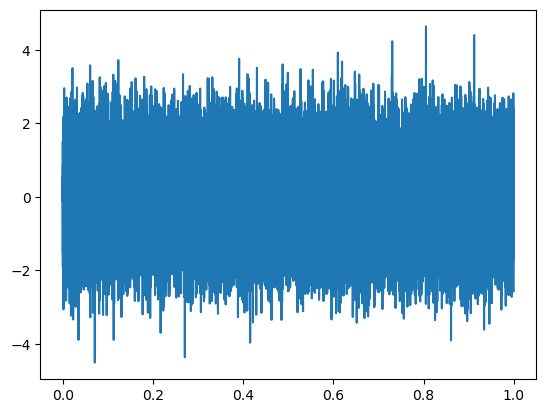

In [4]:
plt.plot(np.arange(0,1,1/48000), bruit[:48000])

## A.3 - Afficher les probability density function (PDF) et  la cumulative distribution function (CDF) empiriques de l'amplitude du bruit en va

In [5]:
bruit_va = np.abs(bruit)

Text(0.5, 1.0, 'Empirical PDF')

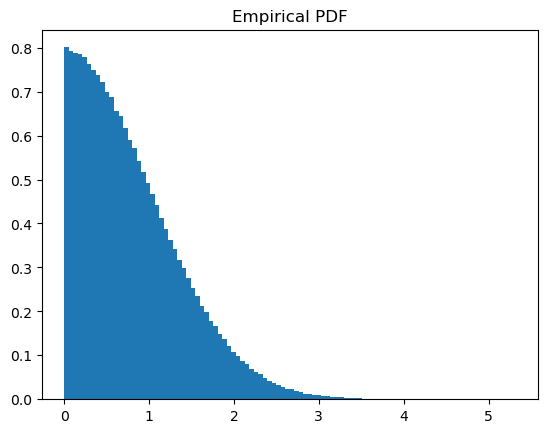

In [6]:
pdf_bruit, bin_pdf_bruit, _ = plt.hist(bruit_va, density=True, bins=100)
plt.title('Empirical PDF')

Text(0.5, 1.0, 'Empirical CDF')

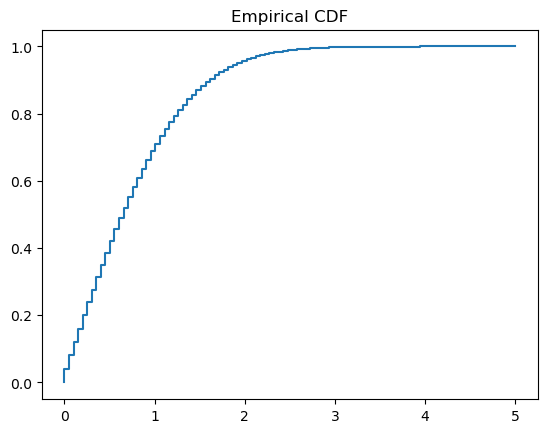

In [7]:
from statsmodels.distributions.empirical_distribution import ECDF

ecdf_generator = ECDF(bruit_va)
x = np.linspace(0, 5, 100)
y = ecdf_generator(x)

plt.step(x,y)
plt.title('Empirical CDF')

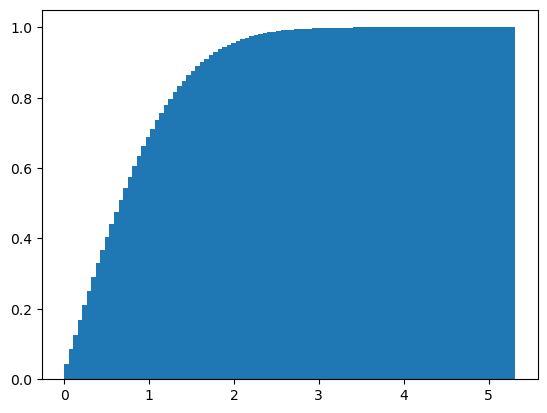

In [9]:
# OU EQUIVALENT sans statsmodel
pdf_bruit,bin_pdf_bruit,_ = plt.hist(bruit_va,bins=100,density=True,cumulative=True)

## A.4 - Identifier les 2 lois de probabilités obtenues à la question précédente 

### a - Pouvez-vous identifier les 2 fonctions ?

Au vu de la forme des 2 fonctions, à quelles fonction analytiques ressemblent-elles ? Si vous avez une idée précise, identifiez la et donnez ses coefficients caractéristiques.
Sinon rendez-vous question suivante :)

Il s'agit de la pdf et cdf de la valeur absolue d'une loi normale de moyenne 0 et de variance 1, appellée loi demi-normale.

### b - Calculez la moyenne et l'écart type du bruit (pas en valeur absolue cette fois)
Info : la classe `nd_array` du module aka bibliotheque aka librairie `numpy` possède des méthodes qui font ça directement.

In [13]:
mean = bruit.mean()
print(mean)

0.0021000489434912562


In [14]:
std = bruit.std()
print(std)

0.9998988458819614


### c - 1 - Sur le même graphe, affichez la PDF de $ \mid bruit \mid $ et la gaussienne de moyenne et d'écart type calculée question précédente

In [15]:
def gaussian(x, mean, std):
    return 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))

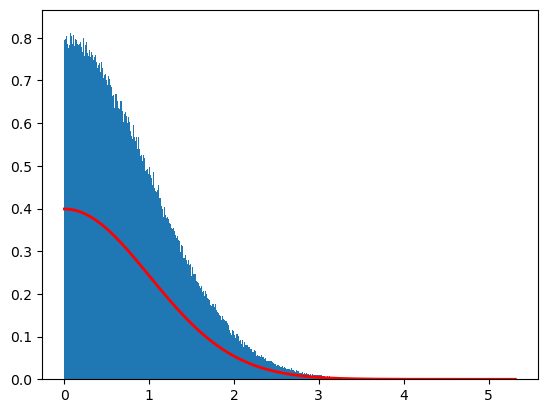

In [16]:
_, x, _ = plt.hist(abs(bruit), density=True, bins=1000)


plt.plot(x, gaussian(x, mean, std), linewidth=2, color='r')
plt.show()

### c - 2 - Que peut-il manquer ?


Les valeurs négatives puisqu'on se sert de la valeur absolue de l'amplitude mesurée. En multipliant la loi normale par deux sur l'intervalle $[0, +\infty]$, on obtient la distribution demi-normale :

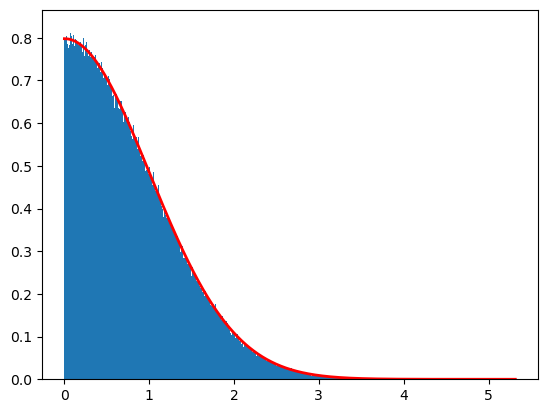

In [18]:
_, x, _ = plt.hist(abs(bruit), density=True, bins=1000)

plt.plot(x, 2 * gaussian(x, mean, std), linewidth=2, color='r')
plt.show()

## A.5 - Evaluer la probabilité des amplitudes du bruit pour différentes plages d'amplitudes

Ici comme très souvent on différencie le bruit du son. Le bruit est une fluctuation statistique, alors que le son est porteur d'information.

On va considérer dans la suite de cette itération que le bruit est parfaitement caractérisé par une loi demi-normale, de moyenne $\mu =0$ et d'écart type $\sigma = 1 $. Sa fonction de densité (CDF) est :
$$ f(x) = \frac{2}{\sigma \sqrt{2 \pi}} \mathrm{e}^{- \frac{1}{2} \left( \frac{ (x - \mu)^2}{\sigma^2} \right)  }$$

On utilisera donc pour répondre aux questions suivantes (A.5) les CDF et PDF analytiques puisque l'on fait l'hypothèse que notre bruit est régi par une distribution demi-normale.

### a -  Donner la fonction (analytique) de répartition (CDF) de la loi demi-normale

$$ \phi(x) = \frac{2}{\sigma \sqrt{2 \pi}} \int_{0}^{x} e^{-\frac{(x-\mu^{2})}{2\sigma^2}} dx = erf \left( \frac{x- \mu}{\sigma\sqrt{2}} \right) $$

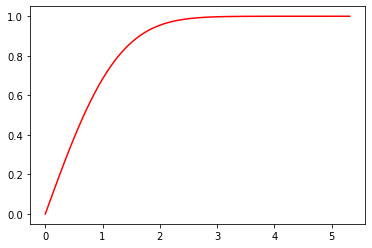

In [120]:
from scipy.stats import halfnorm

plt.plot(x, halfnorm.cdf(x), color = 'r')

### b - 1 Probabilités sur les amplitudes du bruit

* Quelle est la probabilité d'observer des amplitudes comprises dans $[0 , \sigma]$  ?
* Même question pour $[0 , 2\sigma]$
* Même question pour $[0, 3\sigma]$


On utilise le valeur d'écart type du signal $\sigma$, et la cdf que l'on s'est choisi pour modéliser notre bruit :

In [121]:
sigma = 1

Proba_npBruit1 = halfnorm.cdf(1*sigma)
Proba_npBruit2 = halfnorm.cdf(2*sigma)
Proba_npBruit3 = halfnorm.cdf(3*sigma)
print('''[0,1] :''', Proba_npBruit1, '''\n[0,2] :''', Proba_npBruit2, '''\n[0,3] :''', Proba_npBruit3)

[0,1] : 0.6826894921370859 
[0,2] : 0.9544997361036416 
[0,3] : 0.9973002039367398


### b - 2 Probabilités sur les amplitudes du bruit

À l'inverse on s'intéresse maintenant aux amplitudes comprises dans l'intervalle  $[a,\infty]$ (avec $a > 0$).

Déterminer les valeur de a pour que la probabilité de d'observer une amplitude supérieure à $a$ (donc comprise dans $[a,\infty]$) soit de :
    * 5 %
    * 1%
    * 0.1%


In [122]:
a5 = halfnorm.ppf(1-0.05) 
a1 = halfnorm.ppf(1-0.01)
a01 = halfnorm.ppf(1-0.001)

print('5% : ',a5,'\n1% : ', a1, '\n0.1% : ', a01)

5% :  1.959963984540054 
1% :  2.5758293035489004 
0.1% :  3.2905267314919255


# B - Etude d'un son

Vous avez réalisé un enregistrement pendant la nuit. En inspectant rapidement la courbe amplitude(temps), il vous semble voir quelque chose de particulier, et vous soupçonnez fortement qu'il ne s'agisse pas du bruit mais d'un son (une tentative d'effraction ?). Vous trouverez l'extrait en question dans le fihier "son.wav".

## B.0 -  Ecoutez l'extrait

Bon c'est effectivement un son, mais rien d'alarmant. Mais il n'empêche que vous aimerez pouvoir détecter les sons sans avoir à regarder le signal tous les matins.

## B.1 -  Importez le fichier "son.txt" dans un array numpy et faites un plot comparant un zone exclusivement bruitée et une zone de son

In [123]:
son = np.loadtxt("Data/son.txt")

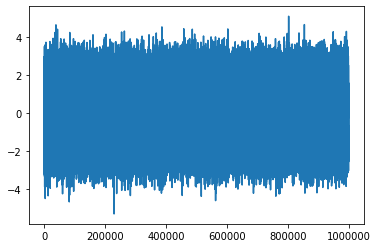

In [124]:
plt.plot(bruit)
plt.show()

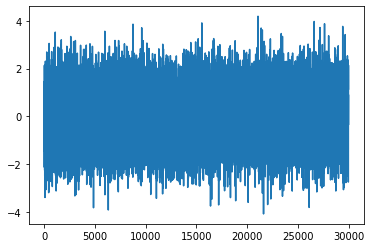

In [125]:
plt.plot(son[460000:490000])
plt.show()

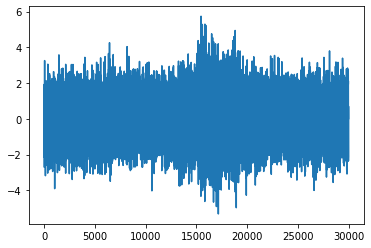

In [126]:
plt.plot(son[490000:520000])
plt.show()

## B.2 -  Identifier approximativement la zone de son et afficher la PDF et la CDF empiriques de l'amplitude (en va), quelle différence avec celles du bruit ?

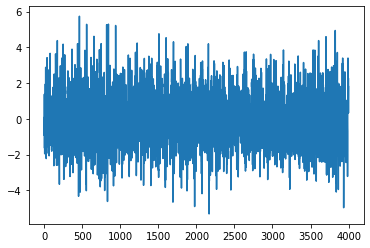

In [127]:
debut_son = 505000
fin_son = 509000
son_clipped = son[debut_son:fin_son]

plt.plot(son_clipped)
plt.show()

Text(0.5, 1.0, 'Empirical PDF')

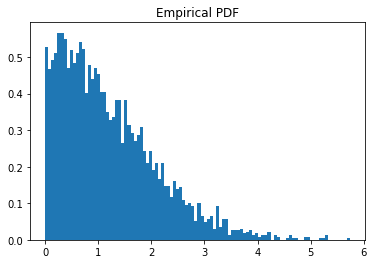

In [156]:
son_clipped_va = abs(son_clipped)
son_pdf, son_bin, _ = plt.hist(son_clipped_va, density=True, bins=100)
plt.title("Empirical PDF")

Text(0.5, 1.0, 'Empirical CDF')

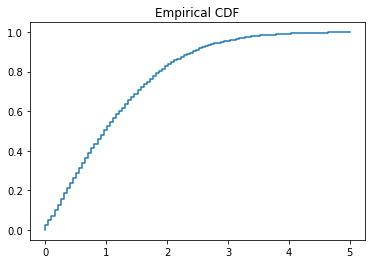

In [155]:
ecdf_generator = ECDF(son_clipped_va)
x = np.linspace(0, 5, 100)
y = ecdf_generator(x)

plt.step(x,y)
plt.title('Empirical CDF')

La variance des amplitudes semble plus grande.

## B.3 - Afficher pour différents seuils d’amplitude (en va) les index où l’amplitude est supérieure à ce seuil (en plottant avec deux couleurs différentes par exemple). 

Conclure sur la possibilité d'identifier l'intervalle du son avec cette méthode.

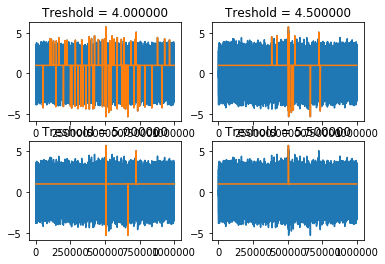

In [130]:
# Mise en évidence des treshold
son_va = abs(son)

fig = plt.figure() # créer un objet de type Figure (canvas)
ax = fig.add_subplot(2, 2, 1) # creér un objet de type Axe
bx = fig.add_subplot(2, 2, 2)
cx = fig.add_subplot(2, 2, 3)
dx = fig.add_subplot(2, 2, 4)

for threshold, subplot in zip([4, 4.5, 5, 5.5], (ax,bx,cx,dx)):
    maxi = np.where(son_va >threshold, son, 1)
    subplot.plot(son)
    subplot.plot(maxi)
    subplot.set_title('Treshold = %f' % threshold)


plt.show()

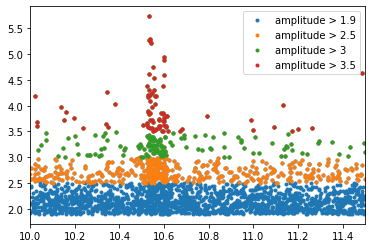

In [131]:
# Autre version
for i in [1.9, 2.5, 3, 3.5]:
    plt.plot(np.arange(len(son))[son > i] / 48000, son[son > i], '.', label='amplitude > {}'.format(i))
plt.xlim(10, 11.5)
plt.legend()
plt.show()

Ces tests seuil ne sont pas précis : soit le seuil est trop bas et l'on détecte également du bruit, soit il est trop haut et l'on manque beaucoup d'amplitudes appartenant à l'intervalle du son.

# Itération 2 - Test d'hypothèse

Plutôt que de faire des tests sur les occurences ponctuelles d'amplitude supérieure à une valeur seuil, vous décidez de faire une étude similaire portant sur le nombre d'occurences durant un certain temps. De cette manière, si le bruit atteint ponctuellement une amplitude importante, on peut se douter qu'il a très peu de chance de réitérer cet "exploit" beaucoup de fois dans un intervalle de temps court. Tout l'enjeu sera de quantifier cette "chance" (ie cette propbabilité).

# A - Un peu de proba


* On note une limite d'amplitude $a_l$. La probabilité d'obtenir sur une unique mesure (on peut dire tirage comme pour les jeux de hasard) une amplitude $a$, telle que $a \geq a_l $ est notée $p$.
* On note $n$, le nombre d'amplitudes mesurées sur un intervalle (échantillon).
* On note $k$ un entier positif inférieur ou égal à $n$. 



## A.1 - Donnez la formule de $P_k^{n}$, la probabilité de tirer $k$ fois une amplitude supérieure ou égale à $a_l$ lors de $n$ tirages.

Les plus affamés d'entre vous peuvent la démontrer. Sinon une recherche sur internet suffira largement.


Il s'agit de la loi binomiale : 

$${\displaystyle \mathbb P_k^{n}={n \choose k}\,p^{k}(1-p)^{n-k}.} $$

## A.2 - Trouvez dans un package python existant une fonction  qui permet de calculer cette probabilité $P_k^{n}$



In [132]:
from scipy.stats import binom

## A.3 - Soit $n =20 $ :

### a - Pour plusieurs valeurs de $p$, calculez $P_k^n$ pour chaque $k=1..n$

Vérifiez bien que la somme des probabilités sur toutes les valeurs de $k$ pour chaque loi vaut 1.

In [133]:
n = 20 # Nombre d'experience réalisée.
probabilities = [1, 0.8, 0.5, 0.2, 0.0] # La probabilité de succès.
# k : la probabilité de k succès dans une répétition de n expériences

for p in probabilities:
    binom_total_p = 0
    for k in range(0, n + 1):
        binom_total_p += binom.pmf(k, n, p)
    print("Somme des probabilités sur k pour p = %f : %f" % (p, binom_total_p))

Somme des probabilités sur k pour p = 1.000000 : 1.000000
Somme des probabilités sur k pour p = 0.800000 : 1.000000
Somme des probabilités sur k pour p = 0.500000 : 1.000000
Somme des probabilités sur k pour p = 0.200000 : 1.000000
Somme des probabilités sur k pour p = 0.000000 : 1.000000


###  b - Affichez en une sur un plot en barre

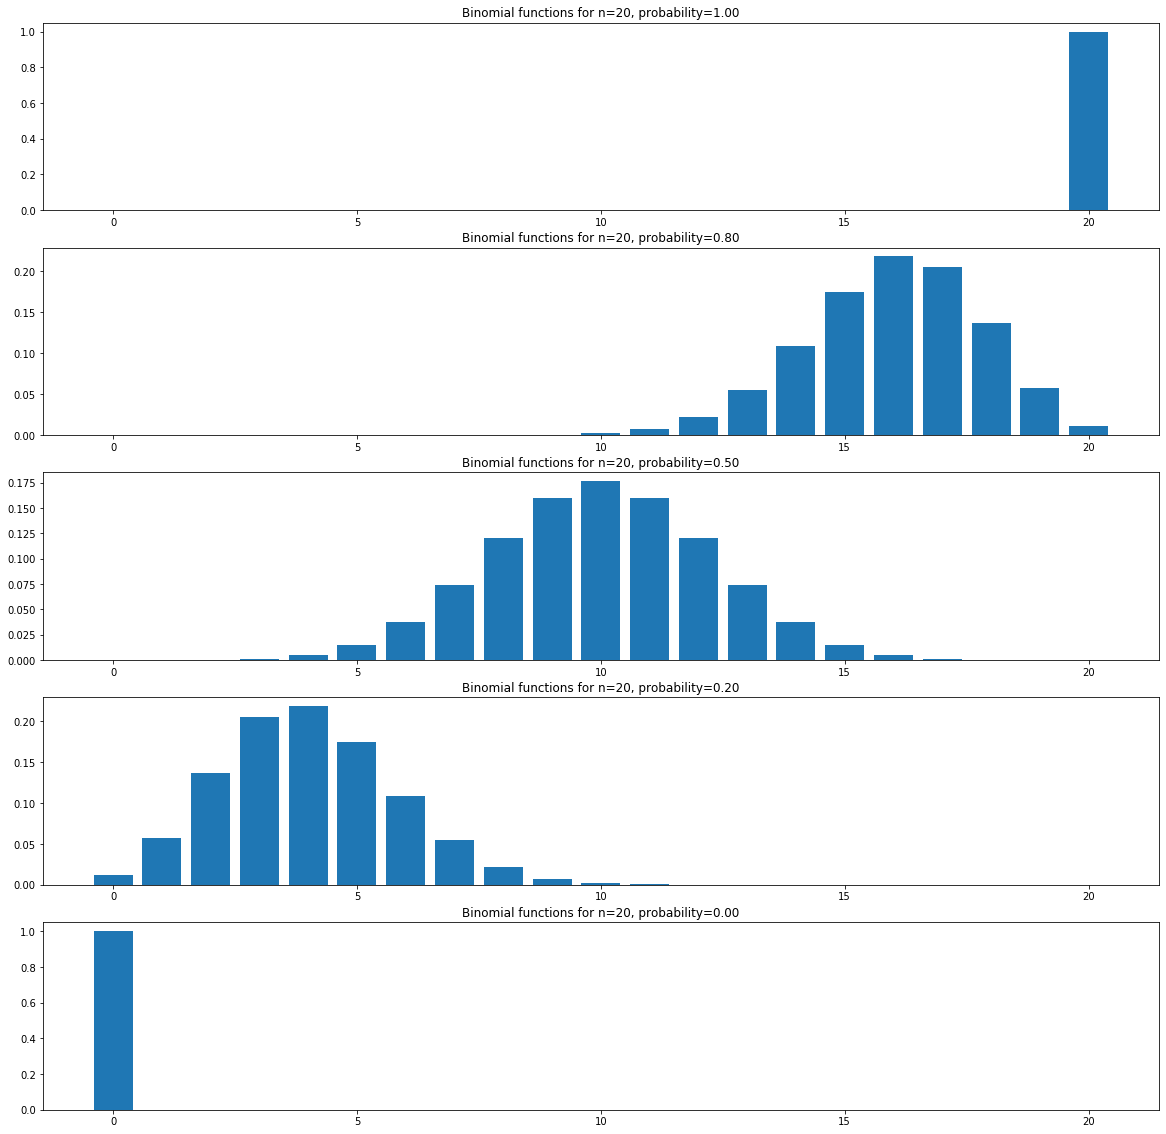

In [134]:
_, ax = plt.subplots(len(probabilities), figsize=(20, 20))
n = 20
x = np.arange(0, n+1, 1)
for i, p in enumerate(probabilities):
    ax[i].set_title(f'Binomial functions for n=20, probability={p:.2f}')
    ax[i].bar(x, binom.pmf(x, n, p))
plt.show()

### c- Affichez les toutes sur le même graphe
Conseil : pour la visibilité utilisez plutôt plot que bar

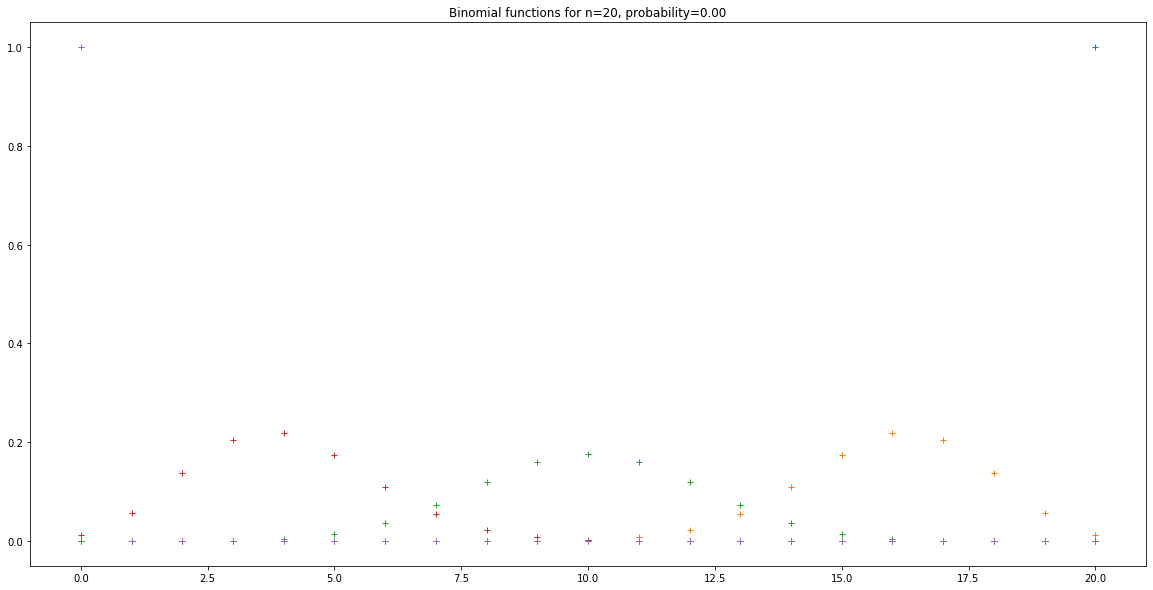

In [135]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()
n=20
x = np.arange(0, n+1, 1)
for i, p in enumerate(probabilities):
    ax.set_title(f'Binomial functions for n=20, probability={p:.2f}')
    ax.plot(x, binom.pmf(x, n, p),'+')
plt.show()

Question subsidiaire : quel objet mathématique permet d'unifier le concept de loi de probabilité discrète et celui de densité de probabilité qui s'applique aux variables aléatoire continues (pdf) ?

La fonction delta de Dirac.

# B - Construction du test d'hypothèse

Vous voulez donc construire votre test d'hypothèse. On s'appuiera pour ce test sur la loi binomiale étudiée partie A. Pour cela, vous avez besoin de définir une hypothèse nulle, une hypothèse alternative, ainsi qu'un critère de significativité.

* Il faudra identifier l'amplitude $a_l$ correspondant à une probabilité $p$. Cette probabilité correspond à la probabilité, sur une seule mesure du bruit, d'obtenir une amplitude supérieure ou égale à $a_l$. Donc vous devrez décider d'abord de la valeur de $p$ pour en déduire $a_l$ (si vous êtes confus, revoyez la partie 4-b de l'itération 1).
* Vous aurez besoin de choisir un $n$. Vous comptabiliserez pour un intervalle comprenant $n$ mesures, le nombre $N_a$ de fois que vous aurez obtenu une mesure $a \geq a_l$.

Mais d'abord :

## B.1 - Questions théoriques (sans code)

### a - Caractérisez l'hypothèse nulle de votre test $H_{0} $


Il n'y a que du bruit dans l'enregistrement.


### b - Caractérisez l'hypothèse alternative $H_1$ (ou $H_a$ selon les gouts)


Il n'y a pas que du bruit dans l'enregistrement.



### c - Identifier l'élément mesurable (i.e. la statistique) qui permettra de réaliser le test


Il s'agit de $N_{a}$, le nombre de fois que $a \geq a_l$.


### d - Rappeler la loi de probabilité de cet élément mesurable (ie cette statistique "sous" $H_0$)


$${\displaystyle \mathbb P_{N_a}^{n}={n \choose N_a}\,p^{N_a}(1-p)^{n-N_a}.} $$


### e -  Définir la p-value d'un test (donner la formule), et la valeur qu'elle prend pour ce test en particulier

p-value : en supposant $H_{0}$ vraie, c'est la probabilité d'avoir une mesure au moins aussi improbable que celle que l'on vient de mesurer. Comme il s'agit d'un test unilatéral à droite (on teste le nombre de valeurs $> a_l$), la p-valeur est donnée par 1 - la fonction de répartition de la statistique sous $H_0$ pour les valeurs observées (en prenant $N_a$ - 1 puisque on a $p $ tel que $a \geq a_l $).

$$\text{p-value} = 1 - \text{binom.cdf}(p, N_a - 1, n)$$


### f - Étant donné le seuil de significativité $\alpha$, identifier dans quelles situations $H_0$ sera rejetée, ou bien  non rejetée.

On rejette $H_0$ dans le cas où on la p-valeur du test est inférieure au seuil de significatitivité : $ \text{p-value} < \alpha$, sinon $H_0$ n'est pas rejetée.

## B.2 Réaliser un test d'hypothèse :

Comme énoncé au début de cette partie B, il faut choisir une valeur pour $p$ et pour $n$. On se fixera $n = 100$, et $p = 0.01$. On se donnera également $\alpha = 0.05 $.

On commencera d'abord par travailler sur un intervalle de 100 mesures au milieu du signal sonore, entre les indices : $[505400, 505500]$.

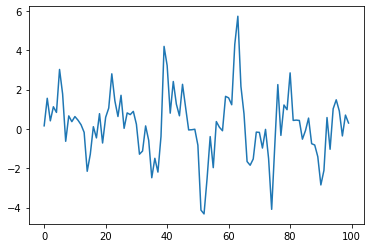

In [136]:
plt.plot(son[505400:505500])
plt.show()

In [137]:
son_clipped2 = son[505400:505500]
son_clipped2_va = np.abs(son_clipped2)

n = len(son_clipped2)
p = 0.01
alpha = 0.05

### B.2.a - Plotter la PMF de la loi de probabilité de l'élément mesurable "sous" $H_0$

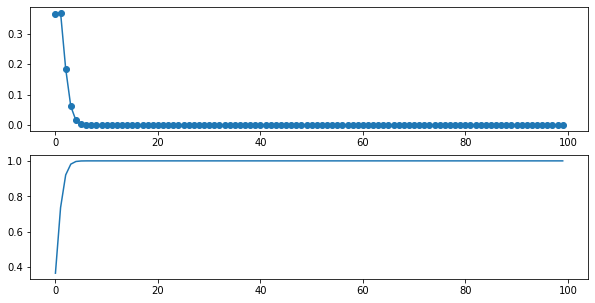

In [138]:
k = np.arange(0, n)
y = binom.pmf(k, n=n, p=p)
cdf = binom.cdf(k, n=n, p=p)

_, (ax1, ax2) = plt.subplots(2, figsize=(10,5))
ax1.plot(k, y, marker='o')
ax2.plot(k, cdf)
plt.show()

### B.2.b - Calculer la valeur de l'élément mesurable d'après $p$

En utilisant la fonction de répartition inverse de la demi-gaussienne, comme en vu à la partie A5b2 de la première itération, on obtient l'amplitude seuil $a_l$ suivante :

In [139]:
al = halfnorm.ppf(1 - p)
n_a = (son_clipped2_va > al).sum()

print("a_l : " + str(al))
print("n_a : " + str(n_a))

a_l : 2.5758293035489004
n_a : 11


### B.2.c - Calculez la p-value de votre test. A quoi correspond-elle ?


In [140]:
p_value = 1 - binom.cdf(n_a-1, n, p)
print(p_value)

6.255518436582008e-09


### B.2.d -  Prendre la décision concernant l'hypothèse posée


Étant donné $\alpha = 0.05$, la p-value est inférieur, donc on rejette l'hypothèse $H_0$ selon laquelle il n'y a que du bruit sur cet intervalle de 100 mesures.

In [141]:
print(p_value < alpha)

True


### B.2.e - Le test que vous venez de construire s'appelle en réalité un test binomial. Trouvez une librairie qui l'implémente et comparez avec votre p-value.

In [142]:
from scipy.stats import binom_test

binom_test(n_a, n, p, alternative='greater')

6.255518382834091e-09

### B.2.f - Réaliser ce même test pour tout l'enregistrement pour chaque intervalle de 100 mesures et retracer le signal avec une couleur différente pour les intervalles pour lesquels l'hypothèse $H_0$ a été rejetée. Ré-essayer avec $\alpha = 0.000001$.


In [143]:
def compute_rejet(son, alpha, n = 100, p = 0.01):
    rejette = np.zeros(len(son), dtype=bool)
    al = halfnorm.ppf(1 - p)
    for i in range(len(son) // n):
        Na = np.count_nonzero(abs(son[n*i : n*(i + 1)]) > al)
        rejet = (1 - binom.cdf(Na - 1, n, p)) < alpha
        #rejet = binom_test(Na, n, p, alternative='greater') < alpha
        rejette[n * i : n * (i + 1)] = rejet
        
    return rejette

In [144]:
def plot_rejet(son,rejette):
    f = 48000
    times = np.arange(0,len(son)/f,1/f)
    fig,ax = plt.subplots(figsize=(16,6))
    ax.plot(times[~rejette],son[~rejette],',',label='Bruit')
    ax.plot(times[rejette],son[rejette],',',label='Son détecté')
    ax.legend()
    ax.grid()

/home/keubou/anaconda3/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/keubou/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


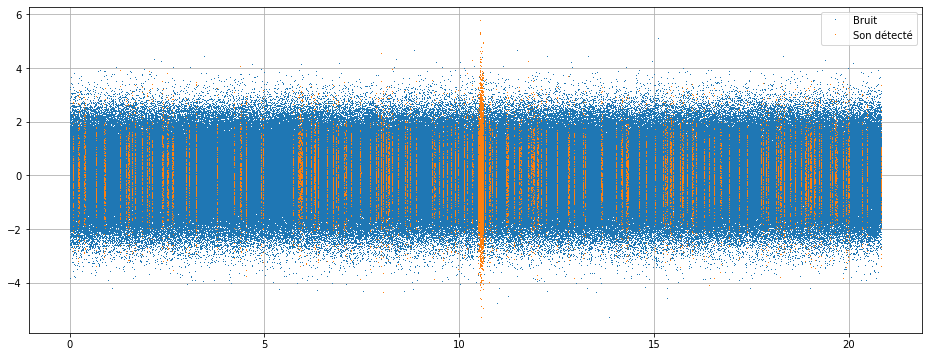

In [145]:
rejette = compute_rejet(son, alpha = 0.05)
plot_rejet(son,rejette)

Avec un seuil de signification $\alpha$ plus petit, on trouve uniquement le son:

/home/keubou/anaconda3/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/keubou/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


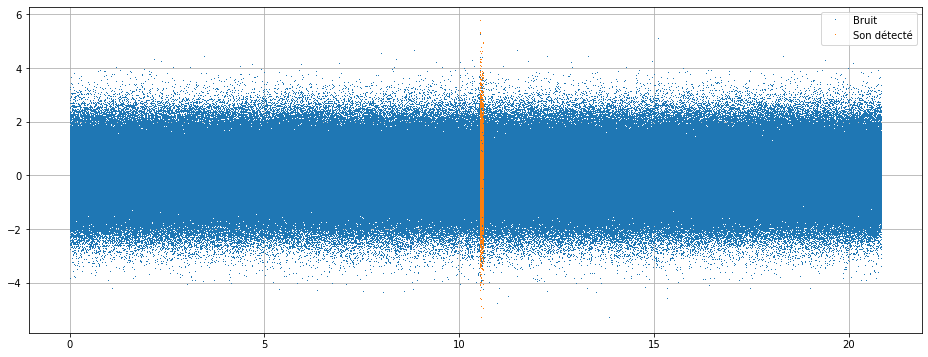

In [146]:
rejette = compute_rejet(son, alpha = 0.00001)
plot_rejet(son, rejette)

### B.2.g - Estimer la proportion de faux positifs avec $\alpha= 0.05$ . Est-ce la valeur attendue, et pourquoi ?

Pour une loi de distribution continue sous H0, $\alpha$ est directement l'estimation du nombre de faux positifs, puisque c'est la probabilité d'observer les données par hasard si H0 est vraie.

Pour une distribution discrète comme la binomiale, on trouve le plus petit k qui correspond à la première probabilité < 0.05 d'avoir k succès parmi n.
Cette probabilité nous donne la proportion attendue de faux positifs, qui n'est donc pas 0.05.

In [147]:
1 - binom.cdf(3, n, p)

0.018374036444649744

In [148]:
for k in range(1, n):
    prob = 1 - binom.cdf(k-1, n, p)
    
    if prob < 0.05:
        break

In [149]:
print("On aura environ %.3f%% de faux positifs en moyenne" % (prob * 100))

On aura environ 1.837% de faux positifs en moyenne


In [150]:
debut_son = 505000
fin_son = 509000

rejette = compute_rejet(son, alpha = 0.05)

nb_intervalles_bruit = (len(son) - (fin_son - debut_son)) // n
nb_intervalles_faux_positifs = (rejette[:debut_son].sum() + rejette[fin_son:].sum() ) // n

taux_faux_positifs_reel = nb_intervalles_faux_positifs / nb_intervalles_bruit

print("On a en pratique %.3f%% de faux positifs" % (taux_faux_positifs_reel * 100))

On a en pratique 1.908% de faux positifs


### B.2.f - Extraire le son détecté et l'enregistrer dans un fichier .wav

Avec $n=100$, on se rend compte qu'il y a certains intervalles au milieu du son ou l'hypothèse nulle n'est pas rejetée (des faux négatifs donc). Plottez ces intervalles.

Avec un $n$ trop petit, on se retrouve avec le même problème que par la méthode du seuillage (B.3 itération 1) : on a soit trop de faux négatifs, soit trop de faux positifs. En effet comme $n=100$ représente $1/480$ème de seconde (puisque l'échantillonnage est de 48000Hz), il est tout à fait possible d'avoir des intervalles avec 100 amplitudes faibles au milieu d'un son.

Refaire le test pour des intervalles d'une seconde ($n = 48000$) avec $\alpha = 0.05$, replotter le résultat, et enregistrer l'intervalle de son détecté dans un fichier wav pour écouter le résultat de votre détection de son par test d'hypothèse. Vous pourrez utiliser la fonction `scipy.io.wavfile.write`.

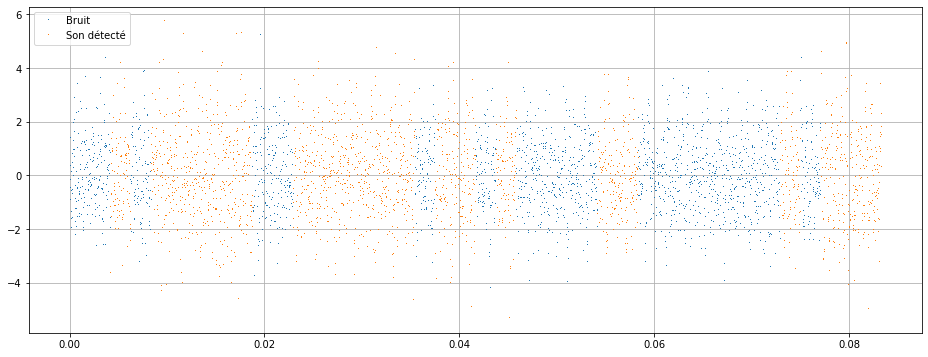

In [151]:
rejette = compute_rejet(son, alpha = 0.00001)

plot_rejet(son[debut_son:fin_son], rejette[debut_son:fin_son])

/home/keubou/anaconda3/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/keubou/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


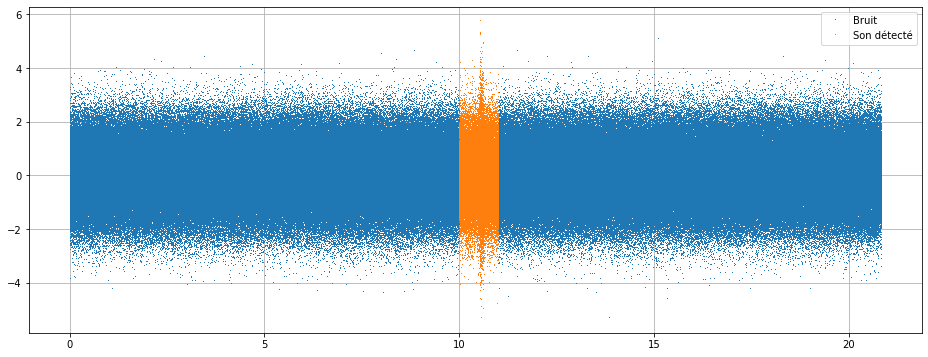

In [152]:
from scipy.io.wavfile import write

rejette = compute_rejet(son, alpha = 0.05, n = 48000)

plot_rejet(son,rejette)
write("son_extrait.wav", 48000, son[rejette].astype(np.int16) * 10)

### B.3 - Regarder la vidéo : https://www.youtube.com/watch?v=jy9b1HSqtSk puis répondre par vrai ou faux à chacune des questions suivantes

#### B.3.a - Pour chaque détection (ie $H_0$ rejetée) j’ai une probabilité 1 - pvalue qu’il s’agisse d’une “vraie détection”
#### B.3.b - En supposant $H_0$ vraie, j’ai une probabilité $\alpha$ de conclure le rejet de $H_0$

a) Faux

b) Vrai

# Pour aller plus loin

Il existe de nombreux tests d'hypothèses bien établis pour tout un tas de situations courantes (comparaison de moyennes entre 2 échantilllons, test de correlation de deux échantillons, test de normalité d'un échantillon, ... ) qui sont décrits dans les chapitres II, III et IV du poly sur les tests d'hypothèses. Vous pouvez également regarder cet article qui les résume avec le code python correspondant :

https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/


Et les notebook kaggle suivants:

https://www.kaggle.com/hamelg/python-for-data-24-hypothesis-testing

https://www.kaggle.com/hamelg/python-for-data-25-chi-squared-tests

https://www.kaggle.com/hamelg/python-for-data-26-anova